In [2]:
#Importing the Libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

In [3]:
data = pd.read_csv(r'C:\Users\tan\Customer_Segmentation\marketing_campaign.csv', sep='\t')

data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


# Data Cleaning

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2212 entries, 0 to 2239
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2212 non-null   int32  
 1   Income               2212 non-null   float64
 2   Kidhome              2212 non-null   int64  
 3   Teenhome             2212 non-null   int64  
 4   Recency              2212 non-null   int64  
 5   Wines                2212 non-null   int64  
 6   Fruits               2212 non-null   int64  
 7   Meat                 2212 non-null   int64  
 8   Fish                 2212 non-null   int64  
 9   Sweets               2212 non-null   int64  
 10  Gold                 2212 non-null   int64  
 11  NumDealsPurchases    2212 non-null   int64  
 12  NumWebPurchases      2212 non-null   int64  
 13  NumCatalogPurchases  2212 non-null   int64  
 14  NumStorePurchases    2212 non-null   int64  
 15  NumWebVisitsMonth    2212 non-null   i

In [5]:
data = data.dropna()
data.shape

(2216, 29)

In [6]:
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])

In [7]:
dates = []

for i in data['Dt_Customer']:
    i = i.date()
    dates.append(i)
    
print(dates)


[datetime.date(2012, 4, 9), datetime.date(2014, 8, 3), datetime.date(2013, 8, 21), datetime.date(2014, 10, 2), datetime.date(2014, 1, 19), datetime.date(2013, 9, 9), datetime.date(2012, 11, 13), datetime.date(2013, 8, 5), datetime.date(2013, 6, 6), datetime.date(2014, 3, 13), datetime.date(2012, 11, 13), datetime.date(2013, 11, 15), datetime.date(2013, 11, 15), datetime.date(2012, 10, 10), datetime.date(2012, 11, 24), datetime.date(2012, 12, 24), datetime.date(2012, 8, 31), datetime.date(2013, 3, 28), datetime.date(2012, 3, 11), datetime.date(2012, 8, 8), datetime.date(2013, 6, 1), datetime.date(2012, 12, 23), datetime.date(2014, 11, 1), datetime.date(2013, 3, 18), datetime.date(2013, 2, 1), datetime.date(2013, 5, 27), datetime.date(2013, 5, 31), datetime.date(2013, 11, 22), datetime.date(2014, 5, 22), datetime.date(2013, 11, 5), datetime.date(2012, 10, 10), datetime.date(2012, 10, 29), datetime.date(2013, 2, 20), datetime.date(2013, 8, 29), datetime.date(2013, 12, 31), datetime.date(2

In [8]:
#Created a feature "Customer_For"
days = []
d1 = max(dates) #taking it to be the newest customer
for i in dates:
    delta = d1 - i
    days.append(delta)
data["Customer_For"] = days
data["Customer_For"] = pd.to_numeric(data["Customer_For"], errors="coerce")

In [9]:
data['Education'].value_counts()

Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64

In [10]:
data['Marital_Status'].value_counts()

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

# Feature Engineering

In [11]:
#Feature Engineering

#Age of customer today
data['Age'] = 2022 - data['Year_Birth']

#Total spending on varios items
data['Spent'] = data['MntFruits'] + data['MntMeatProducts'] + data['MntFishProducts']
+ data['MntSweetProducts'] + data['MntGoldProds']

#Deriving living situation by marital status

data['Living_Widh'] = data['Marital_Status'].replace({"Married":"Partner",
                                                       "Together":"Partner",
                                                       "Absurd":"Alone",
                                                       "Widow":"Alone",
                                                       "YOLO":"Alone",
                                                       "Divorced":"Alone",
                                                       "Single":"Alone"})
#Adding total number of kids that live in the house                                                      
data['Children'] = data['Kidhome'] + data['Teenhome']
                                                      

#Featuring total members in the house

data['Family_Size'] = data['Children'] + data['Living_Widh'].replace({'Alone':1, 'Partner':2}) 

#Feature pertaining parenthood
data["Is_Parent"] = np.where(data.Children> 0, 1, 0)

#Segmentation education leves in three groups

data['Education'] = data['Education'].replace({'Basic':'Undergraduate', '2n Cycle':'Undergraduate',
                                               'Graduation':'Graduate', 'Master':'Postgraduate',
                                              'PhD':'Postgraduate'})



#For clarity
data=data.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat",
                          "MntFishProducts":"Fish","MntSweetProducts":"Sweets",
                          "MntGoldProds":"Gold"})

#Dropping some of the redundant features
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
data = data.drop(to_drop, axis=1)
                                                      

In [39]:
data.describe()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,Response,Customer_For,Age,Spent,Living_Widh,Children,Family_Size,Is_Parent,Clusters,Age_Range
count,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,...,2212.000000,2.212000e+03,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000
mean,0.609855,51958.810579,0.441682,0.505877,49.019439,305.287523,26.329566,167.029837,37.648734,27.046564,...,0.150542,4.424926e+16,53.086347,231.008137,0.645570,0.947559,2.593128,0.714286,1.272604,1.552441
std,0.682635,21527.278844,0.536955,0.544253,28.943121,337.322940,39.744052,224.254493,54.772033,41.090991,...,0.357683,2.009245e+16,11.701599,285.084813,0.478449,0.749466,0.906236,0.451856,1.048921,0.497355
min,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,26.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
25%,0.000000,35233.500000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,...,0.000000,2.937600e+16,45.000000,25.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000
50%,0.000000,51371.000000,0.000000,0.000000,49.000000,175.500000,8.000000,68.000000,12.000000,8.000000,...,0.000000,4.432320e+16,52.000000,90.500000,1.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.000000,68487.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,...,0.000000,5.927040e+16,63.000000,360.250000,1.000000,1.000000,3.000000,1.000000,2.000000,2.000000
max,2.000000,162397.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,...,1.000000,9.184320e+16,82.000000,1727.000000,1.000000,3.000000,5.000000,1.000000,3.000000,2.000000


<Figure size 576x396 with 0 Axes>

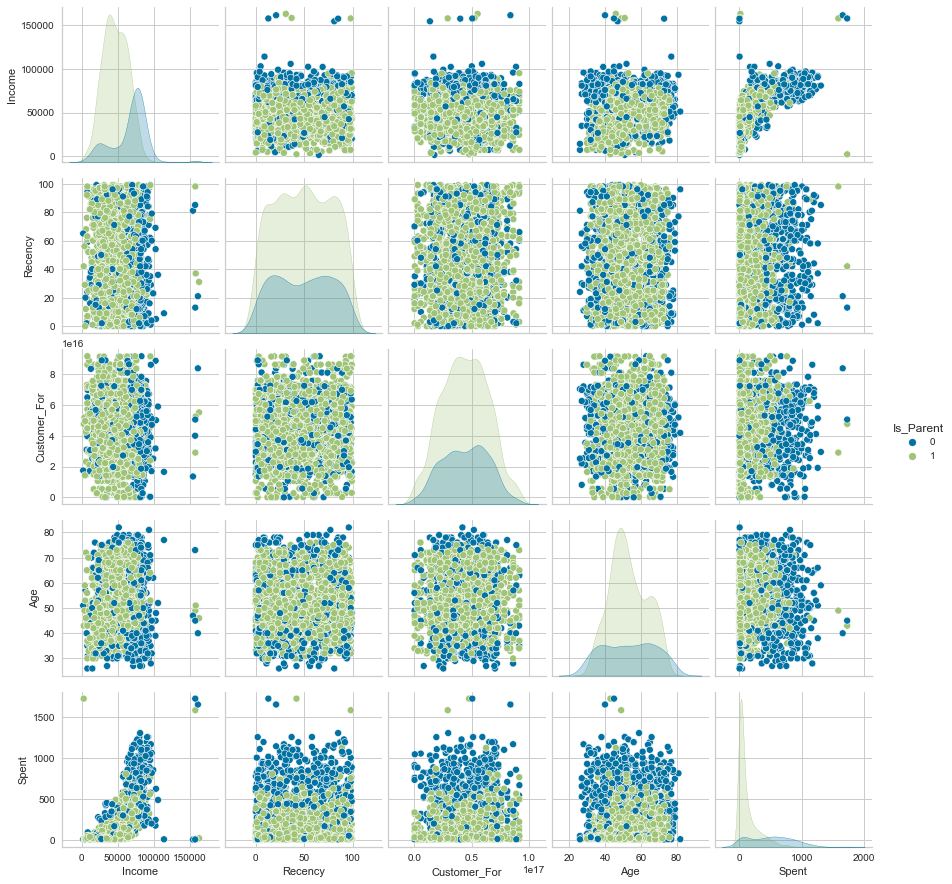

In [61]:
To_Plot = ["Income", "Recency", "Customer_For", "Age", "Spent", "Is_Parent"]
plt.figure()
sns.pairplot(data[To_Plot], hue= "Is_Parent")
plt.show()

#### Removing Outliers

We note that in this case we have some outliers that must be removed in order to keep clear the dataset.

In [14]:
data = data[data.Age <90]
data = data[data.Income <600000]
print('The new data set contains a total of ', data.shape[0], ' rows' )

The new data set contains a total of  2212  rows


<AxesSubplot:>

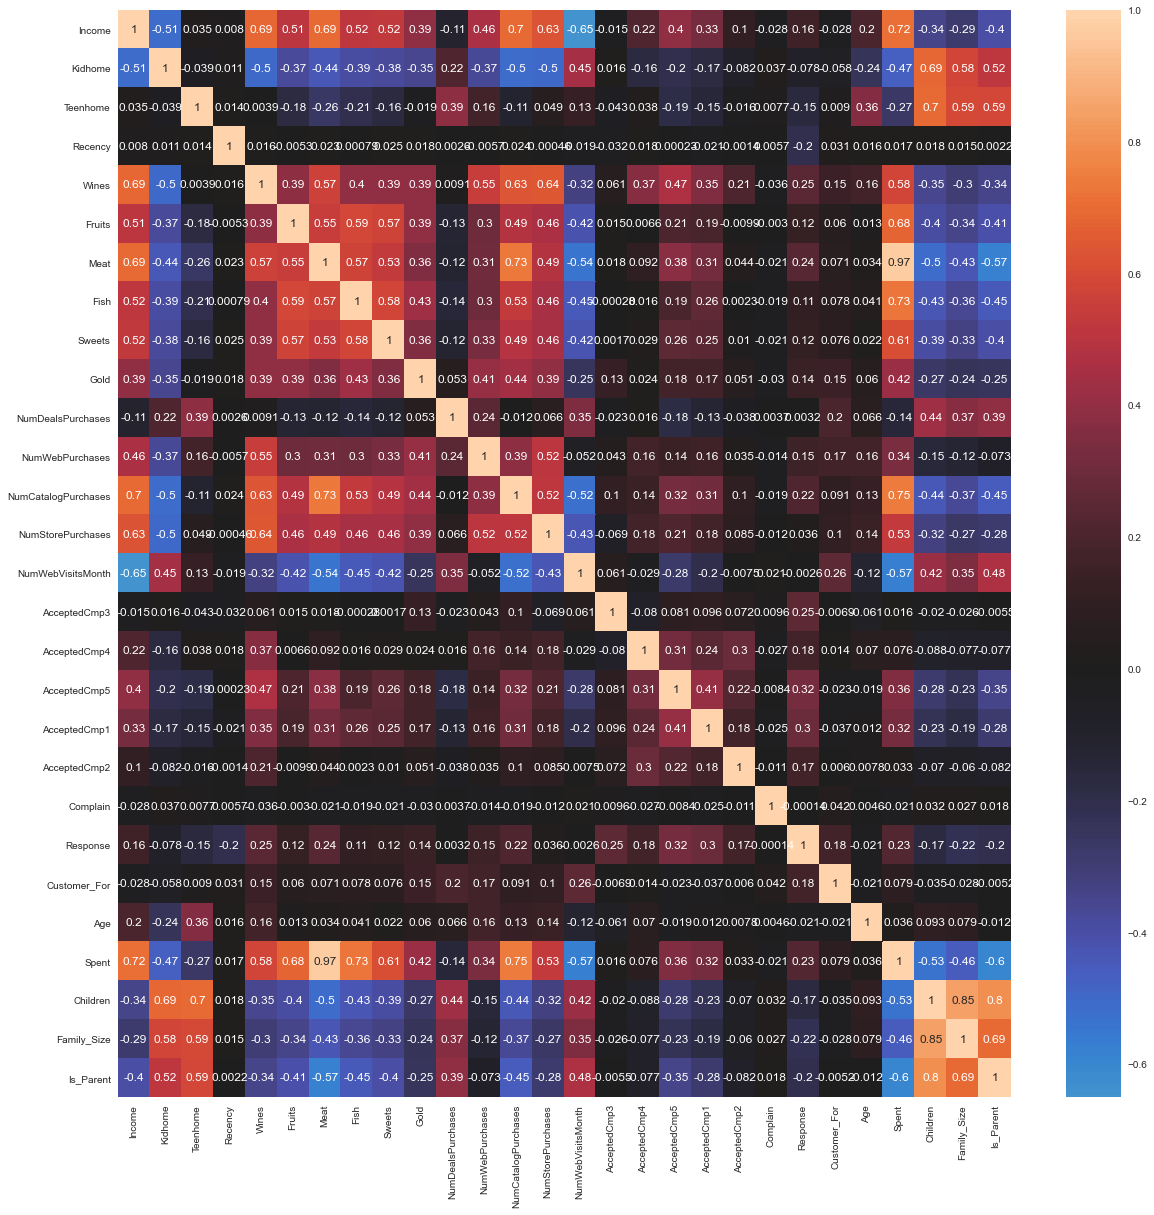

In [15]:
#correlation Matrix

corrmat = data.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corrmat, annot=True, center=0)

###### From the analysis we note:
* Meat and Spent have very high psotive correlation
* Spent and Income have important positive correlation
* Wines and Income have important positive correlation

###### Negative Correlation
* NumberVisitsWebPer Month and income
* KidsHome and Wines
* Meat and Family Size
* Meat and Is Parent 

# DATA PREPROCESSING

### LABEL ENCODING

In [19]:
#Get the listo of categorical variables

s = data.dtypes == 'Object'

object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: []


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2212 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2212 non-null   object 
 1   Income               2212 non-null   float64
 2   Kidhome              2212 non-null   int64  
 3   Teenhome             2212 non-null   int64  
 4   Recency              2212 non-null   int64  
 5   Wines                2212 non-null   int64  
 6   Fruits               2212 non-null   int64  
 7   Meat                 2212 non-null   int64  
 8   Fish                 2212 non-null   int64  
 9   Sweets               2212 non-null   int64  
 10  Gold                 2212 non-null   int64  
 11  NumDealsPurchases    2212 non-null   int64  
 12  NumWebPurchases      2212 non-null   int64  
 13  NumCatalogPurchases  2212 non-null   int64  
 14  NumStorePurchases    2212 non-null   int64  
 15  NumWebVisitsMonth    2212 non-null   i

In [20]:
LE = LabelEncoder()

data['Education'] = LE.fit_transform(data['Education'])

In [21]:
data['Living_Widh'] = LE.fit_transform(data['Living_Widh'])

### Scaling

In [22]:
ds = data.copy()
#remove columns that refer to offers and other promotions
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
ds =ds.drop(cols_del, axis =1)

#scaling

scaler = StandardScaler()

scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds), columns =ds.columns)
scaled_ds.head()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_For,Age,Spent,Living_Widh,Children,Family_Size,Is_Parent
0,-0.893586,0.287105,-0.822754,-0.929699,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,...,2.503607,-0.555814,0.692181,1.973583,1.018352,2.017371,-1.349603,-1.264598,-1.758359,-1.581139
1,-0.893586,-0.260882,1.040021,0.908097,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,...,-0.571340,-1.171160,-0.132545,-1.665144,1.274785,-0.778920,-1.349603,1.404572,0.449070,0.632456
2,-0.893586,0.913196,-0.822754,-0.929699,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,...,-0.229679,1.290224,-0.544908,-0.172664,0.334530,0.196449,0.740959,-1.264598,-0.654644,-1.581139
3,-0.893586,-1.176114,1.040021,-0.929699,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,...,-0.913000,-0.555814,0.279818,-1.923210,-1.289547,-0.691207,0.740959,0.069987,0.449070,0.632456
4,0.571657,0.294307,1.040021,-0.929699,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,...,0.111982,0.059532,-0.132545,-0.822130,-1.033114,-0.084233,0.740959,0.069987,0.449070,0.632456


### DIMENSIONALITY REDUCTION

In [24]:
# Dimensionality reduction with PCA
#Because we have a lot of dimensions it is important to find a way to reduce the dimentions
# In order to visualice better and optimize the model

# we chose the number of dimentions that we want, in this case we gonna use 3.
pca = PCA(n_components=3)

pca.fit(scaled_ds)

PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(['col1','col2','col3']))
PCA_ds.describe().T

# In this case the mayority of information contained in the dataframe scaled_ds
# gonna be projected to the 3 better dimentions, those dimentions are col1, col2, col3

,count,mean,std,min,25%,50%,75%,max
col1,2212.0,1.080108e-16,2.870243,-5.959052,-2.469870,-0.839744,2.309142,7.560056
col2,2212.0,4.487068e-17,1.690455,-4.286242,-1.315786,-0.152763,1.230138,5.948605
col3,2212.0,5.305180e-17,1.221786,-3.737277,-0.828019,-0.033836,0.807142,6.505466


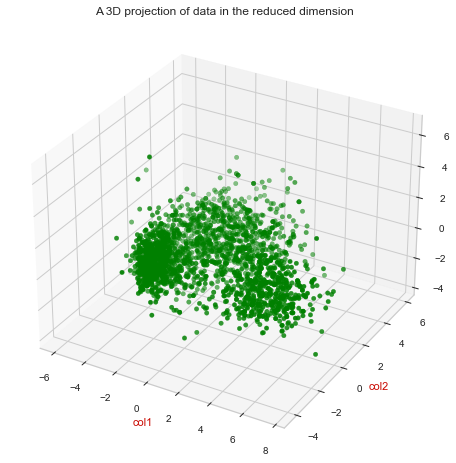

In [69]:
# A 3D projection of data in the reduced dimension

x = PCA_ds['col1']
y = PCA_ds['col2']
z = PCA_ds['col3']

#to plot

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection = "3d")
ax.scatter(x,y,z, c= "green", marker="o")
ax.set_title("A 3D projection of data in the reduced dimension")
plt.xlabel('col1', c ='r')
plt.ylabel('col2', c = 'r')

plt.show()

# CLUSTERING

In [26]:
from yellowbrick.cluster import KElbowVisualizer

Elbow method to determine the number of clusters to be formed: 


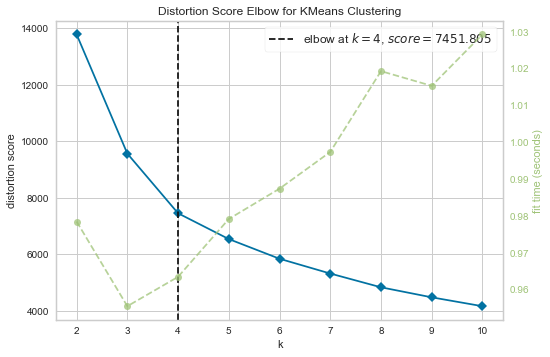

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [27]:
print('Elbow method to determine the number of clusters to be formed: ')

Elbow_M = KElbowVisualizer(KMeans(), k = 10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

In [76]:
AC = AgglomerativeClustering(n_clusters=4)

yhat_AC = AC.fit_predict(PCA_ds)

PCA_ds['Clusters'] = yhat_AC
data['Clusters'] = yhat_AC

In [79]:
data.head().T

,0,1,2,3,4
Education,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Income,5.813800e+04,4.634400e+04,7.161300e+04,2.664600e+04,5.829300e+04
Kidhome,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
Teenhome,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Recency,5.800000e+01,3.800000e+01,2.600000e+01,2.600000e+01,9.400000e+01
Wines,6.350000e+02,1.100000e+01,4.260000e+02,1.100000e+01,1.730000e+02
Fruits,8.800000e+01,1.000000e+00,4.900000e+01,4.000000e+00,4.300000e+01
Meat,5.460000e+02,6.000000e+00,1.270000e+02,2.000000e+01,1.180000e+02
Fish,1.720000e+02,2.000000e+00,1.110000e+02,1.000000e+01,4.600000e+01
Sweets,8.800000e+01,1.000000e+00,2.100000e+01,3.000000e+00,2.700000e+01


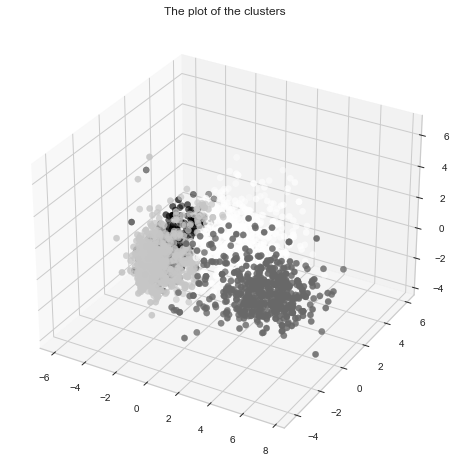

In [30]:
fig= plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection = '3d' , label = 'bla')
ax.scatter(x,y,z, s=40, c=PCA_ds['Clusters'],marker = 'o')
ax.set_title('The plot of the clusters')
plt.show()

# EVALUATION

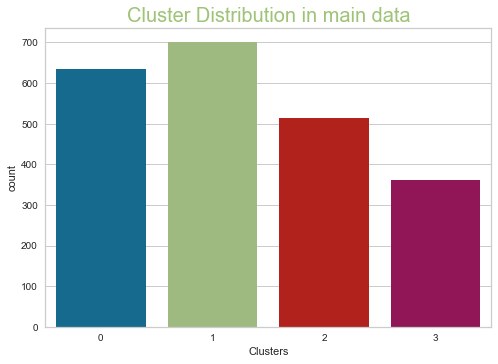

In [84]:
pl = sns.countplot(x = data['Clusters'])
plt.title('Cluster Distribution in main data', fontsize =20, c ='g')
plt.show()

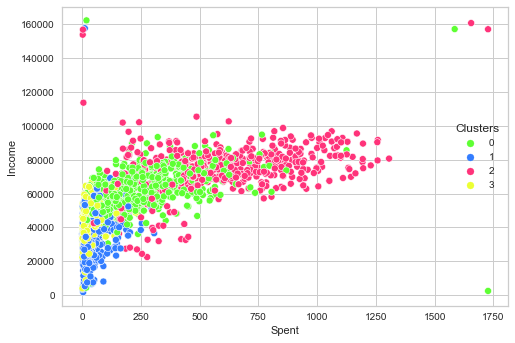

In [86]:
pal = ["#5EFF33","#337DFF", "#FF337A","#ECFF33"]
pl = sns.scatterplot(data = data, x = data['Spent'], y=data['Income'], hue= data['Clusters'], palette= pal)
plt.show()

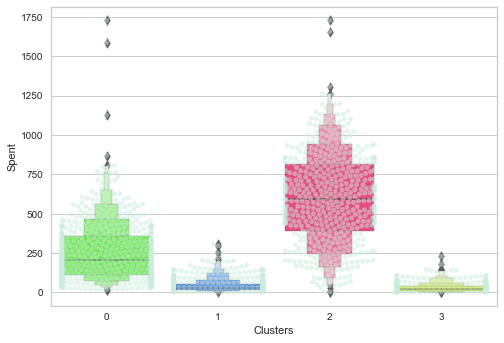

In [87]:
plt.figure()
pl=sns.swarmplot(x=data["Clusters"], y=data["Spent"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=data["Clusters"], y=data["Spent"], palette=pal)
plt.show()

<Figure size 576x396 with 0 Axes>

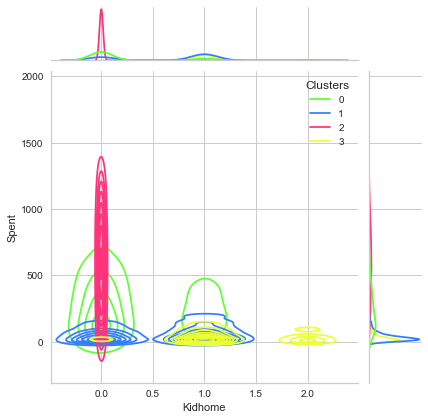

<Figure size 576x396 with 0 Axes>

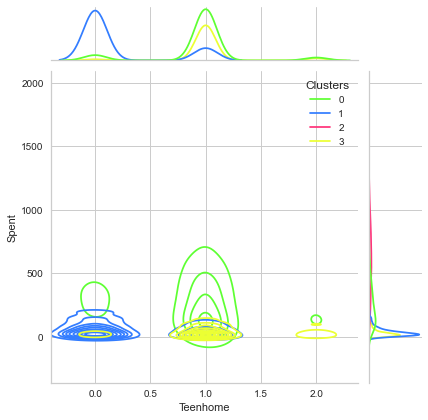

<Figure size 576x396 with 0 Axes>

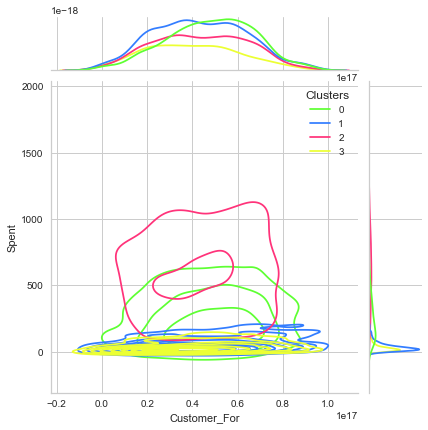

<Figure size 576x396 with 0 Axes>

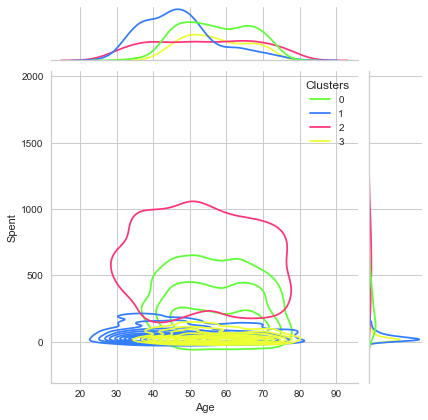

<Figure size 576x396 with 0 Axes>

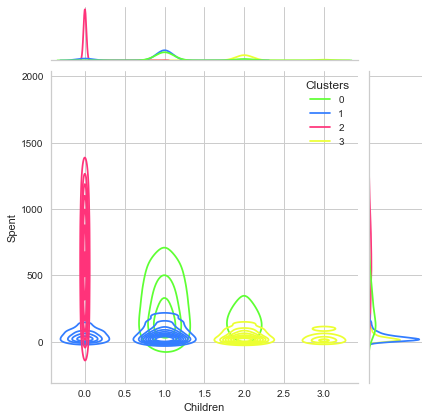

<Figure size 576x396 with 0 Axes>

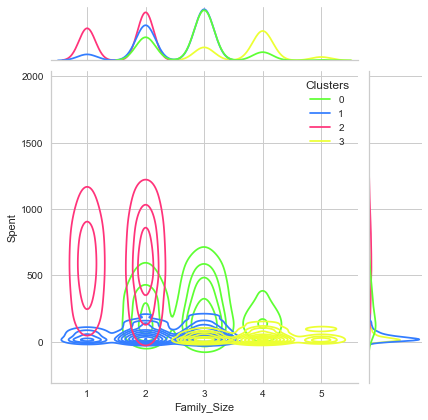

<Figure size 576x396 with 0 Axes>

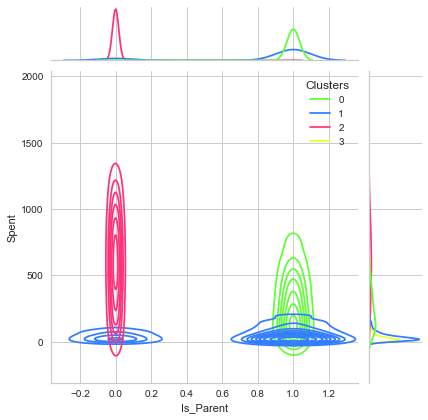

<Figure size 576x396 with 0 Axes>

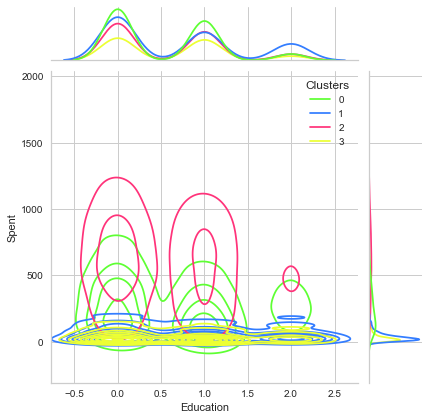

KeyError: 'Living_With'

<Figure size 576x396 with 0 Axes>

In [88]:
Personal = [ "Kidhome","Teenhome","Customer_For", "Age", "Children", "Family_Size", "Is_Parent", "Education","Living_With"]

for i in Personal:
    plt.figure()
    sns.jointplot(x=data[i], y=data["Spent"], hue =data["Clusters"], kind="kde", palette=pal)
    plt.show()